In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_img/macron.jpg')
img.shape

(682, 1024, 3)

#### (X, Y, RGB channels)

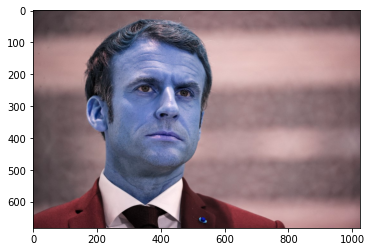

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(682, 1024)

#### only (X, Y) value because RGB(color) is gone

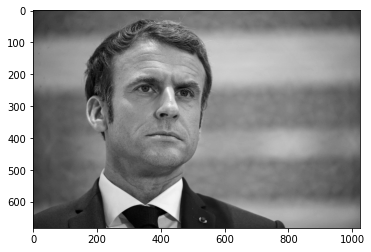

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[227,  99, 380, 380]])

#### (X, Y, Width, Height)

In [7]:
(x, y, w, h) = faces[0]
(x, y, w, h)

(227, 99, 380, 380)

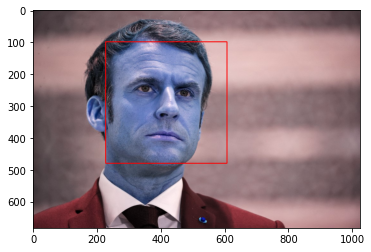

In [8]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

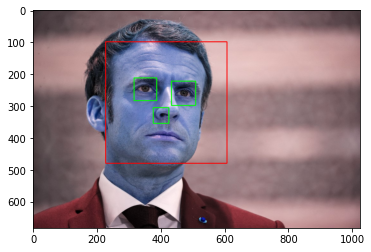

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

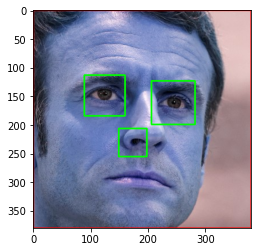

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap="gray")

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

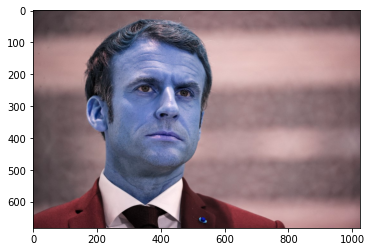

In [12]:
original_img = cv2.imread('./test_img/macron.jpg')
plt.imshow(original_img)

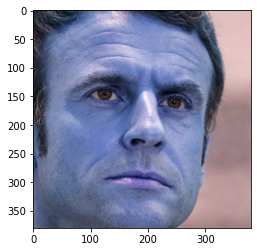

In [13]:
cropped_img = get_cropped_image_if_2_eyes('./test_img/macron.jpg')
plt.imshow(cropped_img)

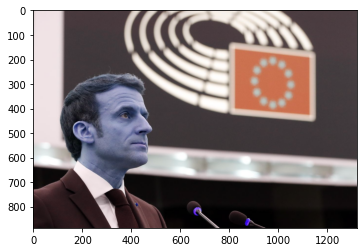

In [14]:
original_img = cv2.imread('./test_img/macron_not.jpg')
plt.imshow(original_img)

In [15]:
cropped_img = get_cropped_image_if_2_eyes('./test_img/macron_not.jpg')
cropped_img

#### returned None

In [16]:
path_to_data = '.\datasets\\'
path_to_crpd_data = '.\\datasets\\A_cropped\\' 

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['.\\datasets\\A_cropped',
 '.\\datasets\\Bolsonaro',
 '.\\datasets\\joe_biden',
 '.\\datasets\\justin_trudeau',
 '.\\datasets\\kim_jong',
 '.\\datasets\\macron',
 '.\\datasets\\modi',
 '.\\datasets\\naftali_bennett',
 '.\\datasets\\putin',
 '.\\datasets\\trump',
 '.\\datasets\\xi_jinping']

In [19]:
import shutil
if os.path.exists(path_to_crpd_data):
     shutil.rmtree(path_to_crpd_data)
os.mkdir(path_to_crpd_data)

In [20]:
cropped_image_dirs = []
Leaders_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    leaders_name = img_dir.split('\\')[-1]    # will give the last element of the list
    Leaders_file_names_dict[leaders_name] = []
    
    for entry in os.scandir(img_dir):    # it will go through each of the images from that folder
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crpd_data + leaders_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped image In folder", cropped_folder)
                
            cropped_file_name = leaders_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            Leaders_file_names_dict[leaders_name].append(cropped_file_path)
            count += 1
            

Generating cropped image In folder .\datasets\A_cropped\Bolsonaro
Generating cropped image In folder .\datasets\A_cropped\joe_biden
Generating cropped image In folder .\datasets\A_cropped\justin_trudeau
Generating cropped image In folder .\datasets\A_cropped\kim_jong
Generating cropped image In folder .\datasets\A_cropped\macron
Generating cropped image In folder .\datasets\A_cropped\modi
Generating cropped image In folder .\datasets\A_cropped\naftali_bennett
Generating cropped image In folder .\datasets\A_cropped\putin
Generating cropped image In folder .\datasets\A_cropped\trump
Generating cropped image In folder .\datasets\A_cropped\xi_jinping


In [24]:
img = cv2.imread('./test_img/macron.jpg')
img.shape

(682, 1024, 3)

In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    print(imArray)
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H = list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

None


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [28]:
Leaders_file_names_dict

{'A_cropped': [],
 'Bolsonaro': ['.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro1.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro2.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro3.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro4.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro5.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro6.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro7.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro8.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro9.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro10.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro11.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro12.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro13.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro14.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro15.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro16.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolsonaro17.png',
  '.\\datasets\\A_cropped\\Bolsonaro/Bolson